# Online labor markets and worker selection: A systematic review

(vignette)

G. Wagner, J. Prester, R. Lukyanenko, G. Paré

Building on the C5-DM framework for data management in literature reviews \[@WagnerEtAl2026\], this vignette illustrates how data management principles can be implemented in an literature review. The framework foregrounds data conceptualization, collection, curation, control, and consumption as foundational activities that shape the transparency, reliability, and reuse of literature review outcomes. The vignette is organized into two complementary parts. The middle column presents a systematic literature review following established reporting conventions. The right column explains how the manuscript is internally grounded in explicit data management decisions aligned with the C5-DM framework, adding an interactive layer of annotations that makes these decisions visible. The vignette thus serves as a concrete illustration of good data management practice in literature reviews—one that readers can follow directly in their own work while also sharpening their understanding of what to look for when evaluating other software solutions and data management approaches.

> **5C-DM Framework**
>
> This column explains how the data management prinicples are implemented. ⬇️
>
> <!-- Click on the buttons for an explanation. -->

## Plan

This review focuses on worker selection decisions in online labor markets. In line with qualitative systematic reviews \[@HigginsGreen2008;@SmithEtAl2011\], it aims at collecting evidence from prior empirical studies and aggregating it.

The review is conducted using a <a href="https://github.com/fs-ise/C5-DM-vignette" target="_blank">shared GitHub repository</a>, which was be synchronized locally by the team.

<a class="pill" target="_blank"
   href="curate-version-control.html"> ⧉ Version-control data (Curate). </a>

## Search

We specified search strategies for the Crossref and DBLP application programming interfaces (APIs)[1] using the core keyword *microsourcing* and a set of semantically related synonyms. We also reused samples from prior reviews \[@WagnerPresterPare2021;@Fiers2023\]. The resulting query formulations were systematically tabulated to document the conceptual scope of the search and to enable consistent execution across data sources (see @tbl-search-overview).

<a class="pill" target="_blank"
   href="control-standard-formats.html"> ⧉ Use standard file formats (Control). </a>

<a class="pill" target="_blank"
   href="conceptualize-raw-primary.html"> ⧉ Link raw and primary records (Conceptualize). </a>

<a class="pill" target="_blank"
   href="consume-reuse-prior-review.html"> ⧉ Reuse prior review data (Consume). </a>

``` python
import json
from pathlib import Path
from urllib.parse import quote

SEARCH_DIR = Path("data/search")

def md_link(text: str, target_path: str) -> str:
    target_path_posix = Path(target_path).as_posix()
    url = target_path_posix
    return f"[{text}]({url})"


json_files = sorted(SEARCH_DIR.glob("*.json"))

rows = []
for jf in json_files:
    try:
        data = json.loads(jf.read_text(encoding="utf-8"))
    except Exception:
        continue

    label = (data.get("label") or jf.stem).strip()
    results_path = (data.get("search_results_path") or "").strip()

    # Render links in the same "data/search/..." style as in your manual table
    json_link_target = f"data/search/{jf.name}"
    search_strategy_cell = md_link(jf.name, json_link_target)

    search_results_cell = (
        md_link(Path(results_path).name, results_path)
        if results_path
        else ""
    )

    rows.append((label, search_strategy_cell, search_results_cell))

print("::: {#tbl-search-overview}")
print("Table: Overview of search strategies and results.\n")
print("| Source | Search strategy | Search results |")
print("|:--------|:-----------------|:----------------|")
for s, strat, res in rows:
  print(f"| {s} | {strat} | {res} |")
print("\n:::")
```

| Source | Search strategy | Search results |
|:---|:---|:---|
| Prior review: @Fiers2023 | [Fiers2023_search_history.json](data/search/Fiers2023_search_history.json) | [Fiers2023.csv](data/search/Fiers2023.csv) |
| Prior review: @WagnerPresterPare2021 | [WagnerPresterPare2021_search_history.json](data/search/WagnerPresterPare2021_search_history.json) | [WagnerPresterPare2021.bib](data/search/WagnerPresterPare2021.bib) |
| Crossref (API search) | [crossref_search_history.json](data/search/crossref_search_history.json) | [crossref.bib](data/search/crossref.bib) |
| DBLP (API search) | [dblp_search_history.json](data/search/dblp_search_history.json) | [dblp.bib](data/search/dblp.bib) |

[1] For the illustration, we relied on open-access API-searches, because licensing issues do not allow for publication of raw data exported from databases like WOS or EBSCO.

The search strategies are stored in JSON format together with the raw data files in the <a href="https://github.com/fs-ise/C5-DM-vignette/tree/main/data/search" target="_blank">data/search</a> directory, in line with the standard of @HaddawayRethlefsenDaviesEtAl2022.

<a class="pill" target="_blank"
   href="collect-search-strategy-design.html"> ⧉ Design effective search strategies (Collect). </a>

<a class="pill" target="_blank"
   href="collect-transparency-coverage.html"> ⧉ Report database coverage (Collect). </a>

## Dedupe

Metadata was prepared using CoLRev and extensions \[@WagnerPrester2025\]. Preparation changes are in the <a href="https://github.com/search?q=repo%3Afs-ise%2FC5-DM-vignette+prep&amp;type=commits" target="_blank">prep commits</a>. <!-- or link to individual commit? https://github.com/fs-ise/C5-DM-vignette/commit/051e115fff389f209afb9a4fbe77e6a33271264c --> Deduplication was done using BibDedupe \[@Wagner2024\]. Deduplication changes are in the <a href="https://github.com/search?q=repo%3Afs-ise%2FC5-DM-vignette+dedupe&amp;type=commits" target="_blank">dedupe commits</a>. <!-- or link to individual commit? https://github.com/fs-ise/C5-DM-vignette/commit/c22178d10fb90954d681f428fc5b08c72b5e6d48 -->

<a class="pill" target="_blank"
   href="collect-prepare.html"> ⧉ Prepare (meta)data (Collect). </a>

<!--
Dedupe changes were validated using the max-diff strategy (`colrev validate XXXX`).
Preparation changes were validated using the max-diff strategy (`colrev validate XXXX`).
-->

## Prescreen

For prescreening, we tested the new <a href="temp_file.txt" target="_blank">llm-prescreener</a>. Comparison with prescreening decisions of GW showed low reliability with the llm-prescreener. Results were therefore reverted and a fully manual prescreen was implemented.

<!--
TODO:
- tested...  in [ref](temp_file.txt){target=_blank}
- (command + kappa)
- results were reverted: ([ref](temp_file.txt))
- This could also be done in a separate branch, or the changes could be undone using a hard git reset. -->

<a class="pill" target="_blank"
   href="control-evaluate-changes.html"> ⧉ Evaluate changes (Control). </a>

> **Manual task**
>
> **Trigger:** `records_deduped.bib` updated  
> **Responsible:** Two independent coders (GW and JP)  
> **Protocol:** screening procedures and criteria (see `protocol/screening.md`)  
> **Expected output:** `records_screened.bib`  
> **History filter:** [prescreen](https://github.com/search?q=repo%3Afs-ise%2FC5-DM-vignette+prescreen&type=commits&p=1)

<a class="pill" target="_blank"
   href="consume-avoid-ineffective-automation.html"> ⧉ Avoid ineffective automation (Consume). </a>

<!-- Screen: fulltext documents were shared in a protected drive (link to Dropbox) -->

## Data extraction

In line with the methodology of systematic reviews \[@HigginsGreen2008;@SmithEtAl2011\], we selected structured data forms to extract evidence from the studies.

> **Manual task**
>
> **Trigger:** `records_deduped.bib` updated  
> **Responsible:** Two independent coders (GW and JP)  
> **Protocol:** data extraction form and protocol (see `protocol/data_extraction.md`)  
> **Expected output:** `extracted_evidence.yaml`  
> **History filter:** [data](https://github.com/search?q=repo%3Afs-ise%2FC5-DM-vignette+data&type=commits&p=1)

<a class="pill" target="_blank"
   href="curate-align-data-with-methods.html"> ⧉ Align data with methods (Curate). </a>

## Synthesis

The narrative synthesis is in the <a href="https://github.com/fs-ise/C5-DM-vignette/blob/main/data/data/paper.md" target="_blank">paper document</a> in Markdown format, allowing for larger teams to work on the same document (similar to the [covid19-review](https://github.com/greenelab/covid19-review)). The current status of the project is automatically updated with every change and reflected in the PRISMA chart (@fig-prisma, in line with the recommendations of @PageMcKenzieBossuytEtAl2021).

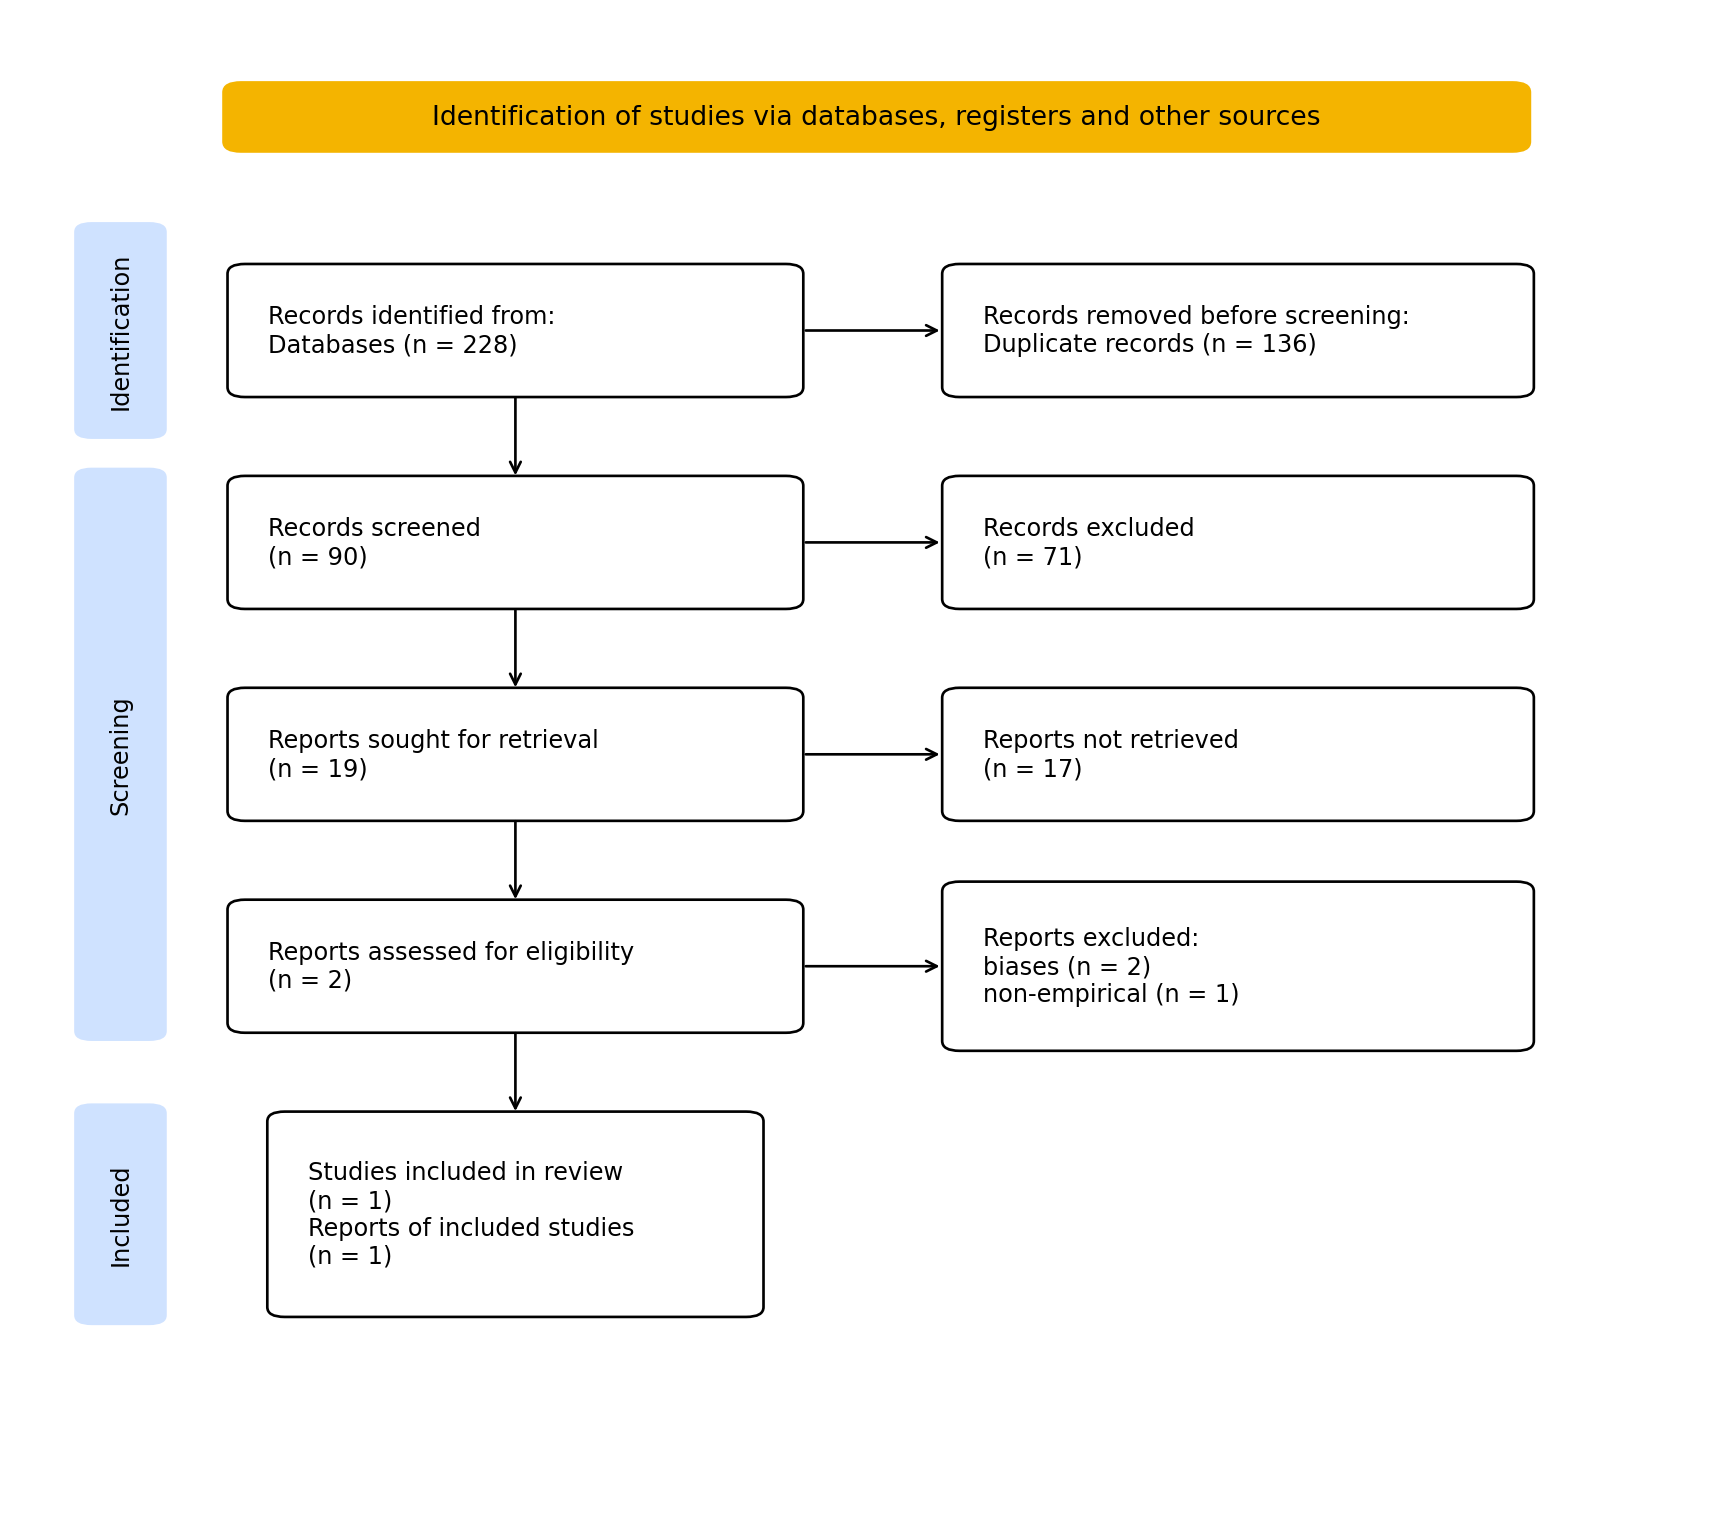

In [2]:
from prisma_flow_diagram import plot_prisma_from_records

plot_prisma_from_records(records_path="/home/gerit/ownCloud/data/literature_reviews/LRDM/C5-DM-vignette/data/records.bib", show=True)

@tbl-evidence provides summary of extracted evidence.

In [3]:
from pathlib import Path
import yaml
import pandas as pd
import matplotlib.pyplot as plt

yaml_path = Path("data/evidence_platform_work_biases.yml")

with yaml_path.open("r", encoding="utf-8") as f:
    doc = yaml.safe_load(f)

df = pd.DataFrame(doc.get("papers", []))

cols = [
    "study_id", "citation_key", "year", "platform", "platform_type",
    "method", "data", "sample",
    "bias_type", "bias_mechanism",
    "outcome_affected", "evidence_level", "direction_of_bias",
    "key_result", "notes",
]
df = df[[c for c in cols if c in df.columns]]

df["year"] = pd.to_numeric(df.get("year"), errors="coerce").astype("Int64")
df = df.sort_values(["bias_type", "evidence_level", "year"], na_position="last").reset_index(drop=True)

compact_cols = [
    "citation_key", "platform_type", "bias_type",
    "outcome_affected", "key_result"
]
df_compact = df[compact_cols].rename(columns={"citation_key": "study"})
df_compact

<!--

@fig-aggregated-evidence aggregates the evidence.
:::

::: {#cell-fig-aggregated-evidence .cell message='false' execution_count=4}
``` {.python .cell-code}
weights = {
    "weak": 1,
    "moderate": 2,
    "moderate_to_strong": 3,
    "strong": 4
}

df_w = df.copy()
df_w["evidence_weight"] = df_w["evidence_level"].map(weights).fillna(0)

score = (
    df_w.groupby("bias_type")["evidence_weight"]
        .sum()
        .sort_values(ascending=False)
)

ax = score.plot(kind="barh", figsize=(8, 3))
ax.set_title("Weighted evidence score by bias type (higher = more/stronger evidence)")
ax.set_xlabel("Bias type")
ax.set_ylabel("Weighted score")
plt.tight_layout()
plt.show()
```

::: {.cell-output .cell-output-display}
![Aggregated evidence (generated from [TODO](link))](index_files/figure-html/fig-aggregated-evidence-output-1.png){#fig-aggregated-evidence width=782 height=278}
:::
:::


:::{#24e6855c .cell .markdown}
-->

## Data availability

To make the review reusable, the data was published on GitHub under the [CC BY 4.0](https://github.com/fs-ise/C5-DM-vignette/blob/main/LICENSE.txt) license[1].

<a class="pill" target="_blank"
   href="curate-share-data.html"> ⧉ Share data for reuse (Curate). </a>

<a class="pill" target="_blank"
   href="consume-select-open-licenses.html"> ⧉ Select open licenses (Consume). </a>

# References

[1] Indexing in SYNERGY, SearchRXiv is planned once the review progresses beyond the *illustration* stages.